In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras


In [2]:
#importing the mnist fashion dataet
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [3]:
#since each image pixle consist of 255 numbers.........we perform an an minmax operation on each pixle.
x_train=x_train/255
x_test=x_test/255

In [4]:
#checking for the shape of dependent and independent variable.
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [5]:
x_train[0].shape

(28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
#reshaping the each image into the gray image.
x_train=x_train.reshape(len(x_train),28,28,1)
x_test=x_test.reshape(len(x_test),28,28,1)

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
#creating the validation dataset
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3, random_state=1)

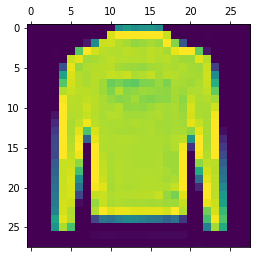

In [11]:
plt.matshow(x_train[0])

In [12]:
# Building the Convolutional Neural Network  Model
# Applying the Hyperparameter tuning concept

#In this model we used the relu activation and Adam optimizer. Since they are simple and efficient.

from tensorflow.keras.optimizers import Adam
def build_model(hp):
    model=keras.Sequential([
       keras.layers.Conv2D(
           filters=hp.Int('conv_1_filter',min_value=32, max_value=512,step=32),
           kernel_size=hp.Choice('conv_1_kernel',values=[3,]),
           activation='relu',
           padding='same',
           input_shape=(28,28,1)),
        
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Dropout(0.25),
        
        keras.layers.Conv2D(
            filters=hp.Int('conv_2_filter',min_value=32, max_value=128,step=32),
            kernel_size=hp.Choice('conv_2_kernel',values=[3,]),
            padding='same',
            activation='relu'),
        
    
        
        keras.layers.Flatten(),
        keras.layers.Dense(units=hp.Int('dense_1_unit',min_value=32, max_value=512,step=32),
            activation='relu'),
        keras.layers.Dense(
            units=hp.Int('dense_2_unit',min_value=32, max_value=128,step=16),
            activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10,activation='softmax')])
    
    model.compile(optimizer=Adam(hp.Choice('learning_rate',values=[0.01,0.001,0.0001,0.00001])),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [13]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [14]:
tuner_search=RandomSearch(build_model,objective='accuracy',max_trials=5,directory='output',project_name='mnist 1')

INFO:tensorflow:Reloading Oracle from existing project output\mnist 1\oracle.json
INFO:tensorflow:Reloading Tuner from output\mnist 1\tuner0.json


In [15]:
x_train.shape

(42000, 28, 28, 1)

In [16]:
tuner_search.search(x_train,y_train,validation_data=(x_val,y_val),epochs=3,batch_size=200,verbose=1)

INFO:tensorflow:Oracle triggered exit


In [17]:
#checking the best model parameters
tuner_search.results_summary()

Results summary
Results in output\mnist 1
Showing 10 best trials
Objective(name='accuracy', direction='max')
Trial summary
Hyperparameters:
conv_1_filter: 352
conv_1_kernel: 3
conv_2_filter: 64
conv_2_kernel: 3
dense_1_unit: 128
dense_2_unit: 80
learning_rate: 0.001
Score: 0.8914762139320374
Trial summary
Hyperparameters:
conv_1_filter: 128
conv_1_kernel: 3
conv_2_filter: 64
conv_2_kernel: 3
dense_1_unit: 448
dense_2_unit: 128
learning_rate: 0.01
Score: 0.8715476393699646
Trial summary
Hyperparameters:
conv_1_filter: 160
conv_1_kernel: 3
conv_2_filter: 128
conv_2_kernel: 3
dense_1_unit: 416
dense_2_unit: 32
learning_rate: 0.01
Score: 0.8258571624755859
Trial summary
Hyperparameters:
conv_1_filter: 256
conv_1_kernel: 3
conv_2_filter: 32
conv_2_kernel: 3
dense_1_unit: 416
dense_2_unit: 112
learning_rate: 1e-05
Score: 0.6911666393280029
Trial summary
Hyperparameters:
conv_1_filter: 352
conv_1_kernel: 3
conv_2_filter: 64
conv_2_kernel: 3
dense_1_unit: 64
dense_2_unit: 80
learning_rate: 1e-

In [18]:
model=tuner_search.get_best_models(num_models=1)[0]

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 352)       3520      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 352)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 352)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        202816    
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
dense_1 (Dense)              (None, 80)                1

In [ ]:
model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10,initial_epoch=3)

Epoch 4/10
1313/1313 [==============================] - 326s 248ms/step - loss: 0.3384 - accuracy: 0.8818 - val_loss: 0.2653 - val_accuracy: 0.9018
Epoch 5/10
1313/1313 [==============================] - 356s 271ms/step - loss: 0.2627 - accuracy: 0.9065 - val_loss: 0.2606 - val_accuracy: 0.9042
Epoch 6/10
1313/1313 [==============================] - 341s 260ms/step - loss: 0.2204 - accuracy: 0.9192 - val_loss: 0.2427 - val_accuracy: 0.9140
Epoch 7/10
1313/1313 [==============================] - 361s 275ms/step - loss: 0.1920 - accuracy: 0.9291 - val_loss: 0.2382 - val_accuracy: 0.9177
Epoch 8/10
1313/1313 [==============================] - 368s 280ms/step - loss: 0.1666 - accuracy: 0.9375 - val_loss: 0.2443 - val_accuracy: 0.9160
Epoch 9/10
1313/1313 [==============================] - 369s 281ms/step - loss: 0.1447 - accuracy: 0.9460 - val_loss: 0.2678 - val_accuracy: 0.9189
Epoch 10/10
1302/1313 [============================>.] - ETA: 2s - loss: 0.1286 - accuracy: 0.9533

In [ ]:
y_pred=model(x_test)